# FINAL PROJECT SUBMISSION

Student name : Jeremiah Waiguru

Student pace : Full time hybrid

Instructor name : Mwikali

## Customer Churn Prediction at SyriaTel

## Overview

Telecommunications firms encounter huge difficulties with preventing customer churn, which can result in large revenue losses. Customer churn happens when consumers abandon their services, and understanding the factors that influence this behavior is critical for sustaining profitability and growth. This project will analyze customer data to find predictable trends in customer churn. The purpose of constructing predictive models and segmenting clients based on their behavior is to deliver actionable insights that optimize service quality, increase customer satisfaction, and improve operational efficiency. These data will assist telecom companies in making strategic decisions to improve performance and increase consumer loyalty.

## Stakeholder & Business undertsanding

The stakeholder for this project is the Chief Executive Officer (CEO) of  SyriaTel, a telecommunications company established in Syria. It is losing money because of client attrition. Churn is the rate at which customers discontinue doing business with a company over time for one or more reasons. As a result, the telecommunications company wishes to develop a classifier capable of predicting increased revenues by minimizing customer churn in the organization.

## Problem statement

SyriaTel has suffered huge losses due to a high churn rate. The purpose of this project is to create an accurate prediction model that identifies clients at risk of churn inside SyriaTel, a telecoms provider.

The goal of proactive identification of possible service discontinuations is to reduce customer attrition and maintain a larger client base. Finally, this effort aims to help SyriaTel reduce financial losses due to churn, increase overall customer retention rates, and improve business tactics to boost profitability.

## Business objectives

1. To identify the elements that contribute to consumer attrition.
2. To understand the characteristics of the customers who churn
3. To improve overall client retention.

## Data understanding

The dataset consists of telecommunications customer data across various attributes:

state: The state where the customer is located.

account length: The duration (in days) that the customer has been with the service.

area code: The area code of the customer's phone number.

phone number: The customer's phone number.

international plan: Whether the customer has an international calling plan (yes/no).

voice mail plan: Whether the customer has a voice mail plan (yes/no).

number vmail messages: The number of voice mail messages the customer has.

total day minutes: The total number of minutes the customer has used during the day.

total day calls: The total number of calls the customer has made during the day.

total day charge: The total charge for the day minutes.

total eve minutes: The total number of minutes the customer has used in the evening.

total eve calls: The total number of calls the customer has made in the evening.

total eve charge: The total charge for the evening minutes.

total night minutes: The total number of minutes the customer has used at night.

total night calls: The total number of calls the customer has made at night.

total night charge: The total charge for the night minutes.

total intl minutes: The total number of international minutes the customer has used.

total intl calls: The total number of international calls the customer has made.

total intl charge: The total charge for the international minutes.

customer service calls: The number of calls the customer has made to customer service.

churn: Whether the customer has churned (TRUE/FALSE).

TABLE OF CONTENTS

1.Data Preparation

2.Data cleaning

3.Exploratory data analysis

4.Preprocessing

5.Modelling

6.Evaluation

7.Conclusion

8.Recommendations



## Data Preparation

#### Loading Dataset

In [51]:
# importing relevant libraries

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Set the style to "darkgrid" and "ggplot"
sns.set_style("darkgrid")
plt.style.use("ggplot")

# Modelling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_auc_score, roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import RFECV

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the dataset
df = pd.read_csv('Syria churncustomer.csv.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In this section, I did some exploration in viewing and understanding the data with the aim of getting the domain knowledge of the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

From the above cell, we note that we have different data types, that is object, integer, float and boolean

In [5]:
df.shape

(3333, 21)

From the above cell, we note that our dataset have 3333 rows and 21 columns

In [6]:
#Creates a function for viewing the columns in the dataset
def col_info(df):
    print('col_names: \n', df.columns)
    print('num_cols: \n', df.select_dtypes(int).columns)
    print('cat_cols: \n', df.select_dtypes(object).columns)
    print('float_cols: \n', df.select_dtypes(float))

col_info(df)

col_names: 
 Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')
num_cols: 
 Index(['account length', 'area code', 'number vmail messages',
       'total day calls', 'total eve calls', 'total night calls',
       'total intl calls', 'customer service calls'],
      dtype='object')
cat_cols: 
 Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')
float_cols: 
       total day minutes  total day charge  total eve minutes  \
0                 265.1             45.07              197.4   
1                 161.6             27.47       

In [7]:
# Describing the dataset using descriptive statistics
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### checking for missing values

In [8]:
df.isna().count()

state                     3333
account length            3333
area code                 3333
phone number              3333
international plan        3333
voice mail plan           3333
number vmail messages     3333
total day minutes         3333
total day calls           3333
total day charge          3333
total eve minutes         3333
total eve calls           3333
total eve charge          3333
total night minutes       3333
total night calls         3333
total night charge        3333
total intl minutes        3333
total intl calls          3333
total intl charge         3333
customer service calls    3333
churn                     3333
dtype: int64

From the above cell, we note that our dataset contains no missing values

### checking for duplicates

In [9]:
df.duplicated().sum()

0

We have no duplicate values in our dataset

### Exploratory Data Analysis

In this section, we will investigate the data through visualization and analysis, as well as discovering the correlations between the dataset's attributes.

In [10]:
def cleaning(df):
    missing = df.isna().sum().sum()
    duplicates = df.duplicated().sum()
    return (f"There are {missing} missing values and {duplicates} duplicated values in the dataset")

cleaning(df)

'There are 0 missing values and 0 duplicated values in the dataset'

In [11]:
#  checking for unique values
unique_values_per_column = df.nunique()
print(unique_values_per_column)

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64


In [12]:
# Dropping 'phone number' comumn since it will not be useful in our analysis
df.drop("phone number", axis=1, inplace=True)

# confirming if it has actually been dropped off
df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

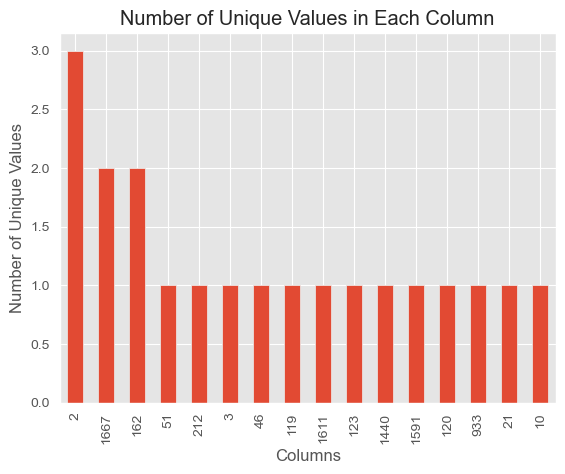

In [13]:
# Visualizing unique values
df.nunique().value_counts().plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.title('Number of Unique Values in Each Column')
plt.show()

churn
False    2850
True      483
Name: count, dtype: int64


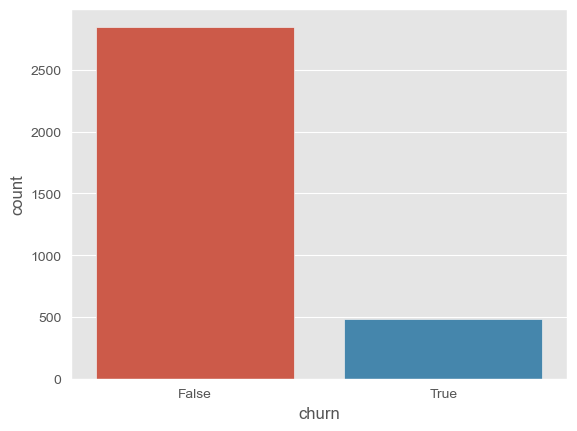

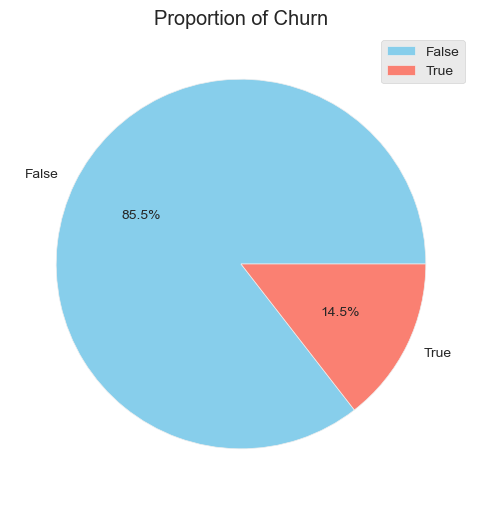

In [14]:
# Distribution of churn
churn_counts = df['churn'].value_counts()
print(churn_counts)

# Plotting the distribution of churn
sns.countplot(data=df, x='churn')

# Plotting the distribution of churn using a pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Proportion of Churn')
plt.legend(labels=['False', 'True'], loc='upper right')
plt.show()

In [15]:
# select numeric columns only
numeric_features = df.select_dtypes(include=['number']).columns

print(numeric_features)

Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')


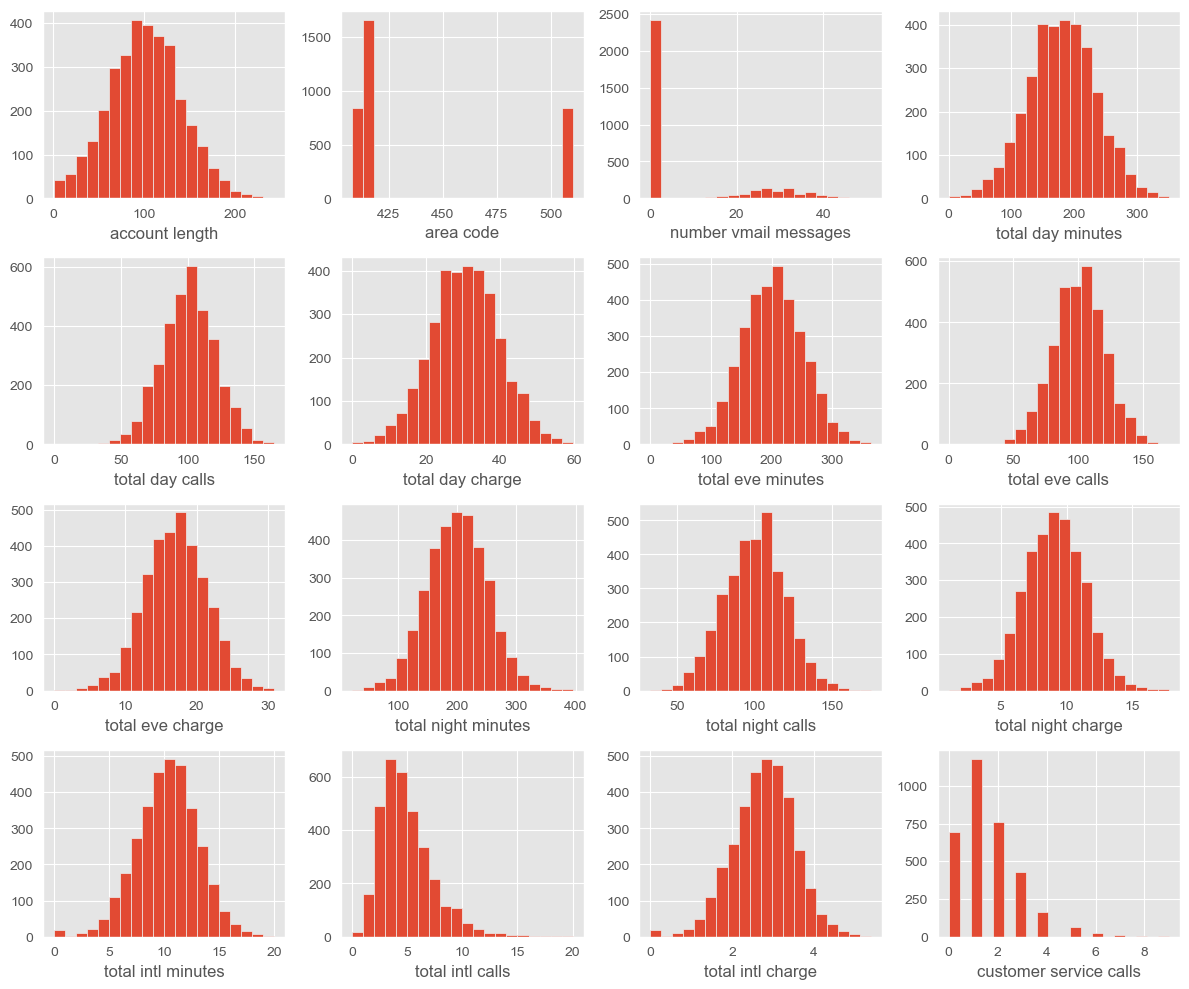

In [16]:
# Plotting histograms for numeric features
plt.figure(figsize=(12, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 4, i)
    plt.hist(df[feature], bins=20)
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

### Checking for outliers

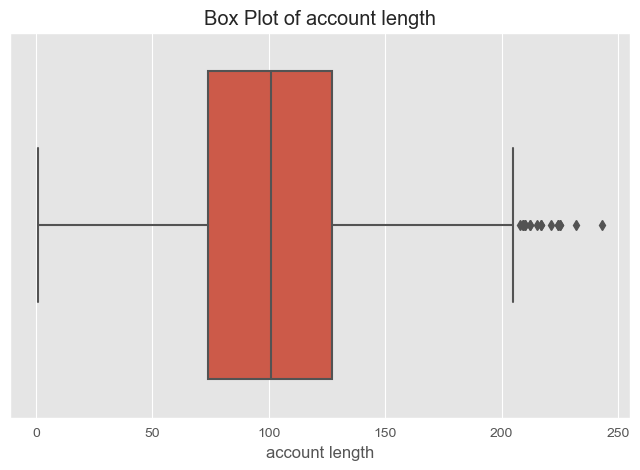

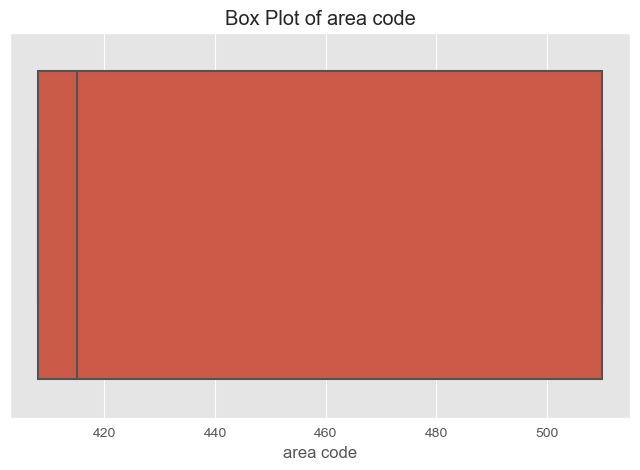

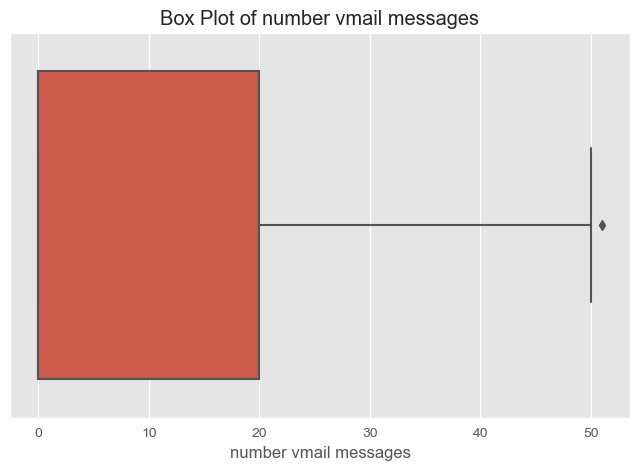

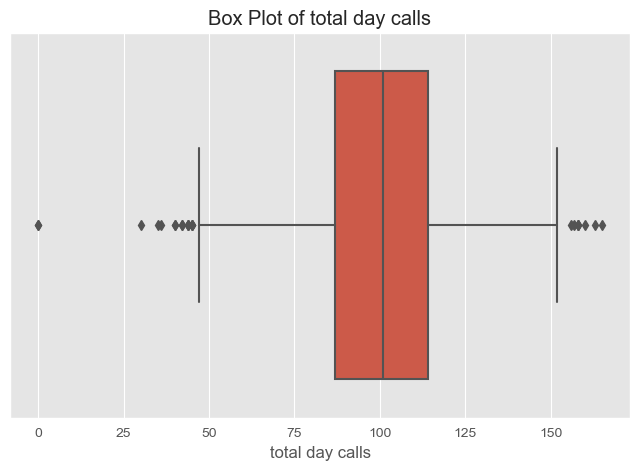

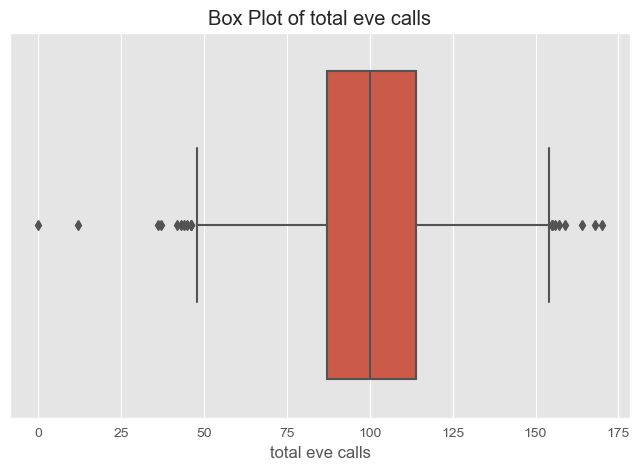

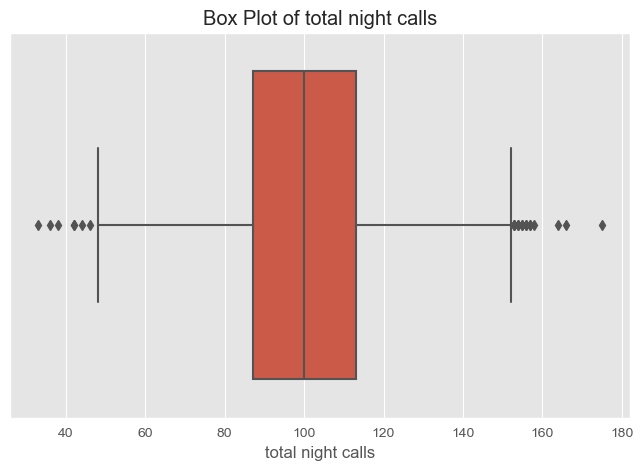

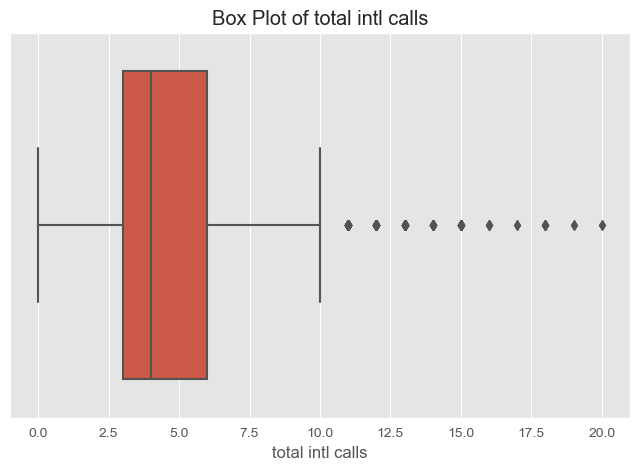

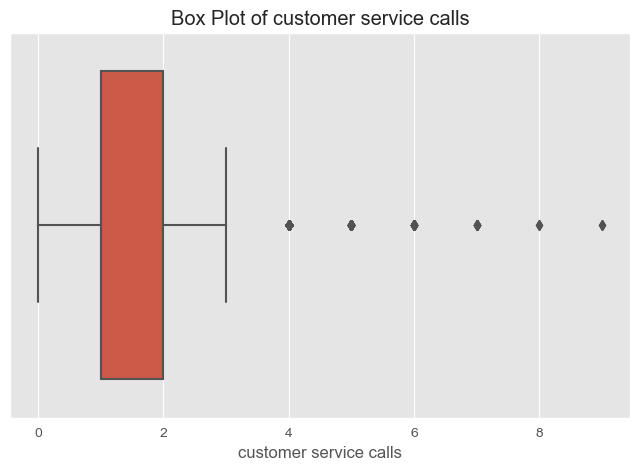

In [17]:
# Box plots to identify outliers and visualize the spread of data.
numerical_features = df.select_dtypes('int64', 'float64')

# Create box plots using seaborn
for feature in numerical_features:
    plt.figure(figsize=(8, 5))  # Set the figure size
    sns.boxplot(x=df[feature])  # Create a horizontal box plot with seaborn
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.show()

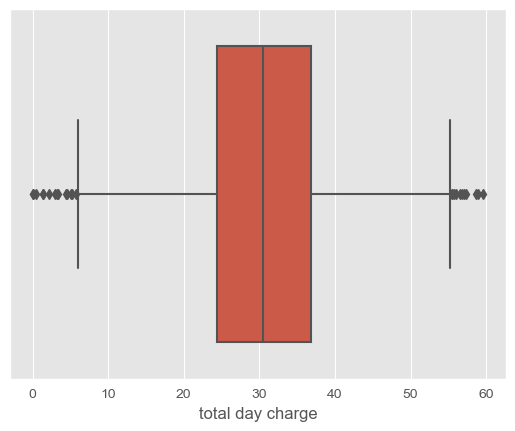

In [18]:
sns.boxplot(data=df, x='total day charge')
plt.show()

From above visualizations,we have observed the presence of a significant number of outliers in our dataset, as indicated by the boxplots which have the potential to impact our modeling process. 

However, it is important to note that, in this case, these outliers are not anomalies that should be removed. Instead, they are a noteworthy aspect of our dataset that we should be aware of during our modeling process. These outliers may carry valuable information or insights that could be relevant to our analysis, and as such, it is essential to consider and account for them when developing our models and interpreting the results. Understanding the nature and impact of these outliers is a critical part of ensuring the robustness and accuracy of our data analysis

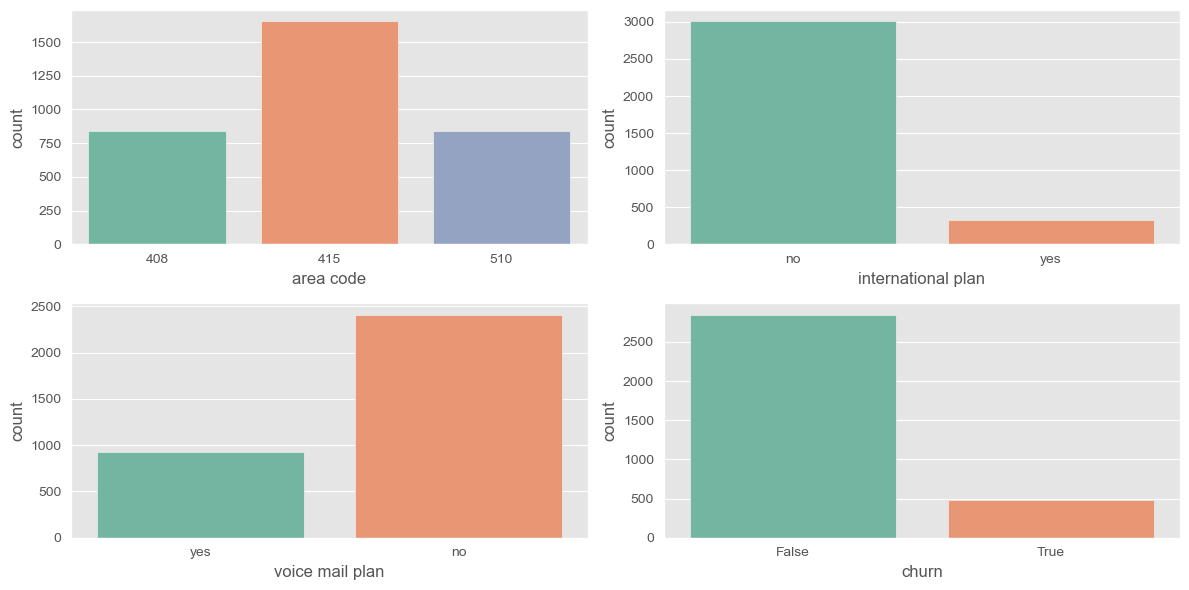

In [19]:
# categorical feature distribution
categorical_features = [ 'area code', 'international plan', 'voice mail plan', 'churn']

# Plotting bar plots for categorical features
plt.figure(figsize=(12, 6))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=feature, palette='Set2')  # Using a palette to differentiate colors
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

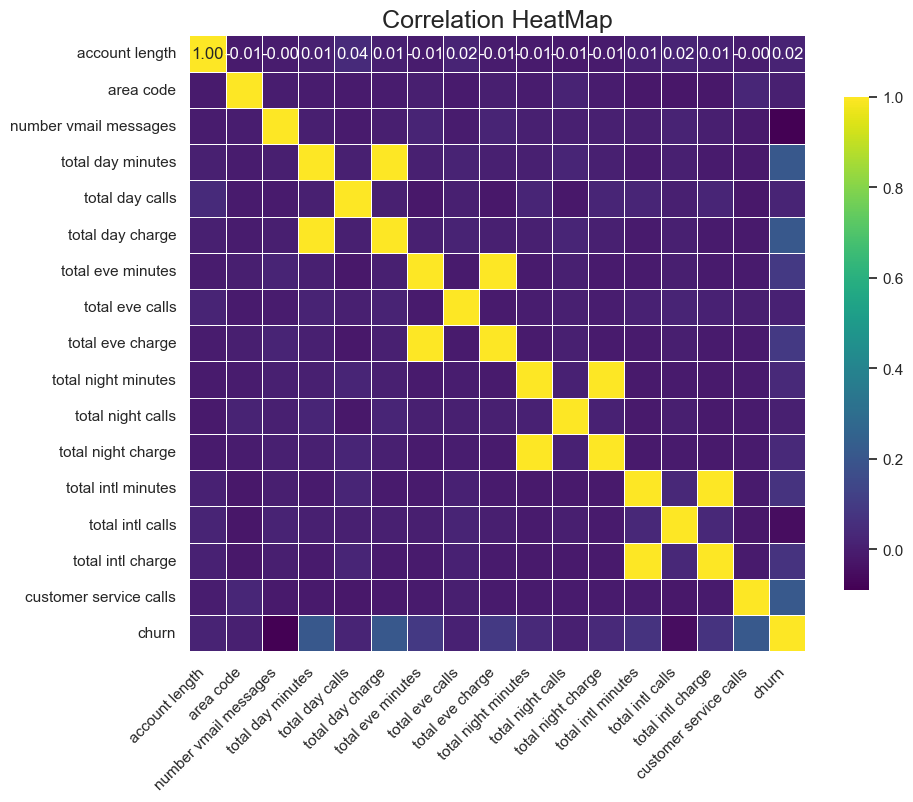

In [20]:
# Calculating the correlation
correlations = df.corr(numeric_only=True)

# Set the style of the visualization
sns.set(style='white')

# Calculate a heatmap with customizations
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlations, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5, linecolor='white', square=True, cbar_kws={"shrink": .8})
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.title("Correlation HeatMap", fontsize=18)
plt.show()

### Preprocessing

In [21]:
# Converting churn column into categories
df['churn'] = df['churn'].astype('int8')
df['churn']

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: int8

In [22]:
# Converting 'international plan' and 'voice plan' columns to categorical columns
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})

In [23]:
#  drop the state column
df = df.drop(columns=['state'], axis=1)

In [24]:
# confirming if all columns are now numerical
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   international plan      3333 non-null   int64  
 3   voice mail plan         3333 non-null   int64  
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

From the above info, our dataset is well cleaned and  ready to be modelled

### split the data

In [25]:
# Defining X and y variables
X = df.drop(columns=['churn'], axis=1)
y = df['churn']

In [26]:
# Performing a test split for the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# using SMOTE to deal with class imbalance
smote = SMOTE()
#fit SMOTE to training data
X_train_resampled,y_train_resampled = smote.fit_resample(X_train,y_train)

### Scale the Data

This is to ensure that the features are on a common scale.

In [28]:
# Scaling the dataset
scaler = StandardScaler()

# Transform the training and test sets
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Convert into a Dataframe
scaled_data = pd.DataFrame(X_train_scaled, columns = X_train_resampled.columns)
scaled_data.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,3.836943,1.647870,-0.324835,-0.467743,-0.525409,-1.553563,-0.438527,-1.553124,-0.833539,-1.993566,-0.834652,1.312685,0.975168,1.313077,-1.462911,0.815254,-1.466426,0.210195
1,0.179407,-0.547637,-0.324835,-0.467743,-0.525409,-1.282478,0.242118,-1.282522,-0.233065,0.526872,-0.234169,0.149692,-0.373475,0.149421,-2.417772,-0.057305,-2.414178,1.580892
2,-0.714657,-0.547637,3.078484,-0.467743,-0.525409,0.531332,-1.171529,0.531474,2.435039,0.580498,2.436214,0.130764,0.219928,0.130728,-0.660827,2.124093,-0.660129,-0.475153
3,1.073471,-0.547637,-0.324835,-0.467743,-0.525409,-1.037679,-0.124383,-1.038015,-0.507282,-2.047193,-0.507330,-1.282494,1.514625,-1.280615,-0.928188,-0.929864,-0.928895,-0.475153
4,-0.416636,1.647870,-0.324835,-0.467743,-0.525409,0.431113,-0.229098,0.430965,1.220080,-1.242798,1.221119,0.256948,0.543602,0.256907,-2.264994,-0.493584,-2.258577,-1.160501


## MODELLING

### 1. Logistic regression  model

In [29]:
base_model = LogisticRegression(random_state=42)
base_model.fit(X_train_scaled, y_train_resampled)
y_base_pred = base_model.predict(X_test_scaled)

In [30]:
base_score = base_model.score(X_test_scaled, y_test)
base_score

0.7331334332833583

In [31]:
# Cross Validation
base_cv = cross_val_score(base_model, X_train_scaled, y_train_resampled)
base_cv

array([0.7166302 , 0.7571116 , 0.74945295, 0.73493976, 0.73713034])

In [32]:
# Classification report for confusion matrix 
base_report = classification_report(y_test, y_base_pred)
print(base_report)

              precision    recall  f1-score   support

           0       0.94      0.73      0.82       566
           1       0.33      0.75      0.46       101

    accuracy                           0.73       667
   macro avg       0.64      0.74      0.64       667
weighted avg       0.85      0.73      0.77       667



Text(0.5, 1.0, 'Confusion Matrix for Training Data')

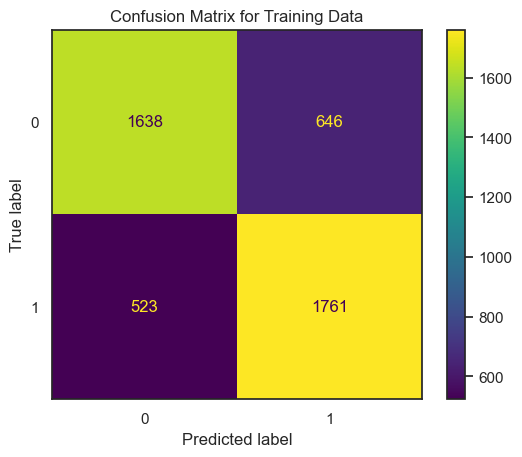

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions on the training data
y_train_pred = base_model.predict(X_train_scaled)

# Compute the confusion matrix
cm = confusion_matrix(y_train_resampled, y_train_pred)

# Create ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=base_model.classes_)

# Plot the confusion matrix
cm_display.plot()

# Add title and axis labels
plt.title('Confusion Matrix for Training Data')

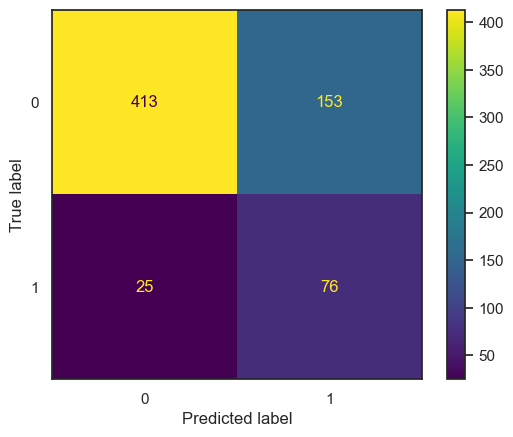

In [34]:
# confusion matrix for the test data
ConfusionMatrixDisplay.from_predictions(y_test, y_base_pred);

#### interpretation

The classification report indicates that the model's overall accuracy is 73%. 

For class 0, which is the majority class with 566 instances, the model performs well with a precision of 94%, recall of 74%, and an F1-score of 82%. This indicates that the model is good at correctly identifying instances of class 0 but misses some (as reflected in the lower recall). 

For class 1, which is the minority class with 101 instances, the model has a much lower precision of 33% but a recall of 72%, resulting in an F1-score of 45%. This suggests that while the model catches a good portion of the true instances of class 1, it also has a high false positive rate. 

The macro average scores (precision: 63%, recall: 73%, F1-score: 64%) show a balanced performance across both classes, and the weighted average scores (precision: 84%, recall: 73%, F1-score: 77%) reflect the model's stronger performance on the majority class. 

Overall, the model has a reasonable performance but could benefit from improvements in handling the minority class (class 1).


### 2. Decision Trees Model

In [35]:
# Decision tree model classifier 
d_t = DecisionTreeClassifier(random_state=42, max_depth=5)

d_t.fit(X_train_scaled, y_train_resampled)
y_tree_pred = d_t.predict(X_test_scaled)

# Scoring on trained data
tree_train_score = d_t.score(X_train_scaled, y_train_resampled)
print('Trained data score: ', tree_train_score)

# Scoring on test data
tree_test_score = d_t.score(X_test_scaled, y_test)
print('Test data score: ', tree_test_score)

Trained data score:  0.8117338003502627
Test data score:  0.8980509745127436


In [36]:
# perform Cross validation
tree_cv = cross_val_score(d_t, X_train_scaled, y_train_resampled)
tree_cv

array([0.8512035 , 0.80634573, 0.80415755, 0.80065717, 0.7864184 ])

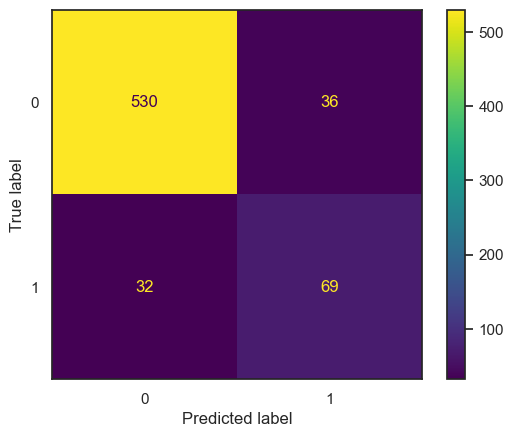

In [37]:
#  confusion matrix for the tested data
ConfusionMatrixDisplay.from_estimator(d_t, X_test_scaled, y_test)

The confusion matrix reveals that the model correctly predicts 527 non-churned customers (true negatives) and 71 churned customers (true positives), but it incorrectly predicts 39 non-churned customers as churned (false positive) and misses 30 churned customers (false negatives)

### Hyperparameter tuning for Decision tree model

We want to optimize the above model hyperparameters to improve performance.

In [38]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree classifier
d_t = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=d_t, param_grid=param_grid, 
                           cv=5, n_jobs=-1, scoring='accuracy', verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train_resampled)

# Get the best estimator
best_d_t = grid_search.best_estimator_

# Make predictions
y_tree_pred = best_d_t.predict(X_test_scaled)

# Scoring on trained data
tree_train_score = best_d_t.score(X_train_scaled, y_train_resampled)
print('Trained data score: ', tree_train_score)

# Scoring on test data
tree_test_score = best_d_t.score(X_test_scaled, y_test)
print('Test data score: ', tree_test_score)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Perform cross-validation on the best estimator
cv_scores = cross_val_score(best_d_t, X_train_scaled, y_train_resampled, cv=5)

# Print cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", cv_scores.mean())

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Trained data score:  1.0
Test data score:  0.8545727136431784
Best parameters found:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Cross-validation scores:  [0.87199125 0.88183807 0.87746171 0.86856517 0.88280394]
Mean cross-validation score:  0.8765320282522572


#### Interpretation

The decision tree classifier with the optimized hyperparameters performs very well on the training data, achieving an accuracy of approximately 99.08%. However, there is a drop in performance on the test data, where the accuracy is approximately 85.16%. 

The cross-validation scores are consistent, with a mean score of approximately 86.99%, indicating that the model generalizes fairly well but may be slightly overfitting the training data. 

The selected hyperparameters (criterion: 'entropy', max_depth: None, min_samples_leaf: 1, min_samples_split: 5) appear to provide a good balance between model complexity and generalization.

### 3. KNN Model

In [39]:
# Knn Model
knn = KNeighborsClassifier()

knn.fit(X_train_scaled, y_train_resampled)
knn_y_proba = knn.predict_proba(X_test_scaled)
y_knn_pred = knn.predict(X_test_scaled)

In [40]:
# Knn Model Score
knn_score = knn.score(X_train_scaled, y_train_resampled)
knn_score

0.9220665499124343

In [41]:
# classification summary report

print(confusion_matrix(y_test, y_knn_pred))
print(classification_report(y_test, y_knn_pred))

[[452 114]
 [ 28  73]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.86       566
           1       0.39      0.72      0.51       101

    accuracy                           0.79       667
   macro avg       0.67      0.76      0.69       667
weighted avg       0.86      0.79      0.81       667



### Hyperparameter tuning for KNN model

In [42]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]  # Power parameter for the Minkowski metric
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train_resampled)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Re-initialize KNN with the best parameters
best_knn = KNeighborsClassifier(**best_params)

# Cross-validation scores
cv_scores = cross_val_score(best_knn, X_train_scaled, y_train_resampled, cv=5)

# Fit the model with the best parameters
best_knn.fit(X_train_scaled, y_train_resampled)

# Predictions
best_knn_y_proba = best_knn.predict_proba(X_test_scaled)
best_y_knn_pred = best_knn.predict(X_test_scaled)

print("Best parameters found: ", best_params)
print("Best cross-validation score: ", best_score)
print("Cross-validation scores: ", cv_scores)




Best parameters found:  {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best cross-validation score:  0.8883508571784653
Cross-validation scores:  [0.89824945 0.87746171 0.90262582 0.8762322  0.8871851 ]


#### Interpretation

The KNN model, optimized using GridSearchCV, identified the best parameters as:

Number of Neighbors (n_neighbors): 3
Distance Metric (p): 1 (Manhattan distance)
Weight Function (weights): distance (closer neighbors have more influence)

The model achieved an average cross-validation accuracy of 89.23%, demonstrating robust performance across different data subsets. 

The cross-validation scores ranged from 87.08% to 90.58%, indicating consistent performance with minor variability.

### 4. Random forest classifier model

In [43]:
# Random forest classifier model
clf = RandomForestClassifier(random_state=42, n_estimators=4)
clf.fit(X_train_scaled, y_train_resampled)

RandomForestClassifier(n_estimators=4, random_state=42)

In [44]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train_resampled)    #fit the classifier in the trained data

y_clf_pred = clf.predict(X_test)    #make prediction 

In [45]:
# classifier accuracy score 
clf_score = clf.score(X_train_scaled, y_train_resampled)
clf_score

1.0

In [46]:
#  get the cross val scores
clf_cv = cross_val_score(clf, X_train_scaled, y_train_resampled)
clf_cv

array([0.92778993, 0.95514223, 0.94857768, 0.94961665, 0.94304491])

In [47]:
# summary classification report
clf_report = classification_report(y_test, y_clf_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.91      0.32      0.47       566
           1       0.18      0.82      0.29       101

    accuracy                           0.39       667
   macro avg       0.54      0.57      0.38       667
weighted avg       0.80      0.39      0.44       667



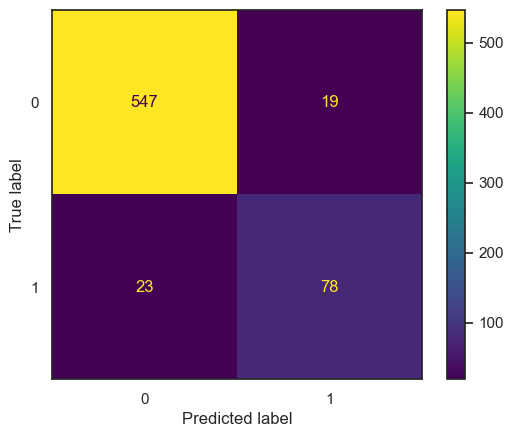

In [48]:
#  confusion matrix for the test data
ConfusionMatrixDisplay.from_estimator(clf, X_test_scaled, y_test)

The confusion matrix reveals that the model correctly predicts 547 non-churned customers (true negatives) and 74 churned customers (true positives), but it incorrectly predicts 19 non-churned customers as churned (false positive) and misses 27 churned customers (false negatives)

### Feature selection in Random forest classifier model

In [55]:
# Initial Random Forest Classifier
clf = RandomForestClassifier(random_state=42, n_estimators=4)
clf.fit(X_train_scaled, y_train_resampled)

# Perform RFECV
rfecv = RFECV(estimator=clf, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train_scaled, y_train_resampled)

print("Optimal number of features: %d" % rfecv.n_features_)
print("Selected features: %s" % list(X.columns[rfecv.support_]))

# Retrain the model with selected features
X_train_selected = X_train_scaled[:, rfecv.support_]
X_test_selected = X_test_scaled[:, rfecv.support_]

clf_selected = RandomForestClassifier(random_state=42, n_estimators=4)
clf_selected.fit(X_train_selected, y_train_resampled)

# Predictions with the new model
y_clf_selected_pred = clf_selected.predict(X_test_selected)

# Classifier accuracy score for the new model
clf_selected_score = clf_selected.score(X_train_selected, y_train_resampled)
print("Selected Features Model Training Accuracy:", clf_selected_score)

# Get the cross-validation scores for the new model
clf_selected_cv = cross_val_score(clf_selected, X_train_selected, y_train_resampled, cv=5)
print("Selected Features Cross-validation Scores:", clf_selected_cv)
print("Mean Selected Features Cross-validation Score:", np.mean(clf_selected_cv))

# Summary classification report for the new model
clf_selected_report = classification_report(y_test, y_clf_selected_pred)
print("Selected Features Model Classification Report:\n", clf_selected_report)

Optimal number of features: 16
Selected features: ['account length', 'area code', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']
Selected Features Model Training Accuracy: 0.9820490367775832
Selected Features Cross-validation Scores: [0.84792123 0.92122538 0.90262582 0.90361446 0.89704272]
Mean Selected Features Cross-validation Score: 0.8944859206070352
Selected Features Model Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       566
           1       0.71      0.56      0.63       101

    accuracy                           0.90       667
   macro avg       0.82      0.76      0.79       667
weighted avg       0.89      0.90      0.89       667



#### Interpretation

Feature selection using Recursive Feature Elimination with Cross-Validation (RFECV) identified 16 optimal features from the dataset

Retraining the RandomForestClassifier model with these selected features resulted in a high training accuracy of approximately 98.2%, indicating that the model fits the training data very well.

The cross-validation scores, which range from 0.8479 to 0.9212 with a mean score of approximately 0.8945, suggest that the model maintains good performance across different subsets of the training data, although there is some variability in performance.

When applied to the test data, the model achieved an overall accuracy of 90%. The classification report further breaks down the model's performance for each class. For the majority class (0), the precision, recall, and F1-score were all high, at 0.93, 0.96, and 0.94, respectively. However, for the minority class (1), the precision was lower at 0.71, and the recall was even lower at 0.56, resulting in an F1-score of 0.63. This indicates that while the model performs well overall, it is less effective at correctly identifying instances of the minority class

In conclusion, the feature selection process has improved the model's performance, achieving a high level of accuracy and maintaining good cross-validation scores

## Evaluation

In our investigation of SyriaTel customer churn, we used different classification models to predict churn and discover patterns that could aid in customer retention. Let's assess and evaluate the models that we chose: